In [1]:
# Data Analysis
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
from scipy import sparse

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Text Processing
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Machine Learning packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import sklearn.cluster as cluster
from sklearn.manifold import TSNE

# Model training and evaluation
from sklearn.model_selection import train_test_split

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.naive_bayes import MultinomialNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

C:\Users\Byoung Jin Oh\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [8]:
#loading dataset
data_set = pd.read_csv("total_mbti_new.csv")
data_set

,Unnamed: 0,type,authors,posts
0,0,enfp,astridchan__,"Hi ENFPs, have you ever experienced ending up ..."
1,1,enfp,Fancy-Assignment-467,"Hey guys, quick question: what do most guys in..."
2,2,enfp,FutureCookies,"A GIRL SPERM 😭😭😭 honestly right, this is a les..."
3,3,enfp,CosmicJoke5067,Self imposed standards + Fi is a good thought....
4,4,enfp,foxinator2_0,it'd be a fun death :D|||why are people just s...
...,...,...,...,...
4372,4372,istj,imPepperPotts,"Fav, butcher. Great artwork btw|||I literally ..."
4373,4373,istj,Arrogant-Engine2883,NaN
4374,4374,istj,Fantastic_Winter8465,There are definitely cool people there and I h...
4375,4375,istj,Special-Hospital-225,So I thought I was an istj as all the tests an...


In [9]:
# posts 가 null 인행 삭제.
data_set[data_set['posts'].isnull()]
for i in data_set[data_set['posts'].isnull()].index:
    data_set.drop(index=[i], inplace=True)

In [10]:
data_set= data_set.reset_index(drop=True)

In [11]:
# 1명의 유저가 여러개의 MBTI를 가지고 있는 경우 확인
stand = data_set['authors'].value_counts() >= 2 

In [12]:
len(stand[stand==True].index)
# 1명의 유저당 1개의 mbti만 갖고있음을 확인!

0

In [13]:
# 필요한 칼럼만 뽑아내서 진행.
data = data_set[['type', 'posts']]

In [14]:
data['type'].value_counts()

intp    435
intj    404
infp    389
infj    363
enfp    348
entp    346
istp    298
enfj    268
entj    244
istj    185
isfp    181
estp    162
esfp    158
isfj    142
estj    136
esfj    131
Name: type, dtype: int64

In [15]:
data.posts[0]

'Hi ENFPs, have you ever experienced ending up being someone’s MPDG? I would like to believe that sometimes it wasn’t unintentional when it happens like I am so deadass wanting to make emotionally unexpressive guys into someone who is able to feel but when it finally happens - I start being resentful as if the only reason why he became a bit expressive was because I ‘coaxed’ him into doing that and it no longer feel genuine. It’s a bit messed up because that was originally the main goal but once you’re in that situation and had a time to reflect on every action you did to get to the point - you’ll realize that you should never have to ask someone to change.|||Not a man but I brought this up with my fiance. We met online and I’ve been crushing on him a few months prior to me messaging him. Lololol. I just laid the groundwork and let things unfold. I was the one to confess first as well. Well, basically, he told me that he’s thankful I did and taking such initiative is super attractive t

In [16]:
# df 모양 확인
data.shape

(4190, 2)

In [17]:
types = np.unique(np.array(data_set['type']))
types

array(['enfj', 'enfp', 'entj', 'entp', 'esfj', 'esfp', 'estj', 'estp',
       'infj', 'infp', 'intj', 'intp', 'isfj', 'isfp', 'istj', 'istp'],
      dtype=object)

## 시각화 진행
- 전처리 전 분류 확인

In [18]:
total = data.groupby(['type']).count()*100
# 각 유저 1명당 100개의 글을 수집했음!
total

,posts
type,
enfj,26800
enfp,34800
entj,24400
entp,34600
esfj,13100
esfp,15800
estj,13600
estp,16200
infj,36300


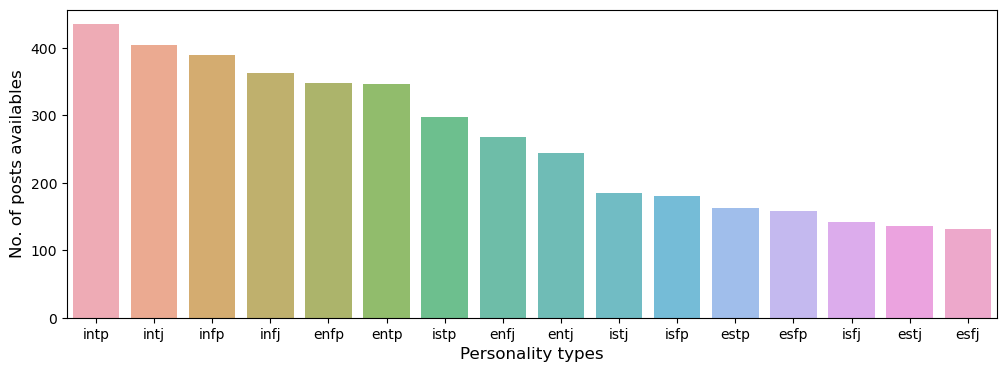

In [19]:
#mbti 타입별 분포 확인.
cnt_srs = data['type'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=cnt_srs.index,y= cnt_srs.values, alpha=0.8)
plt.xlabel('Personality types', fontsize=12)
plt.ylabel('No. of posts availables', fontsize=12)
plt.show()

In [20]:
# 시각화용 df를 복사해 생성하자.
df = data.copy()

<AxesSubplot:xlabel='type', ylabel='words_per_comment'>

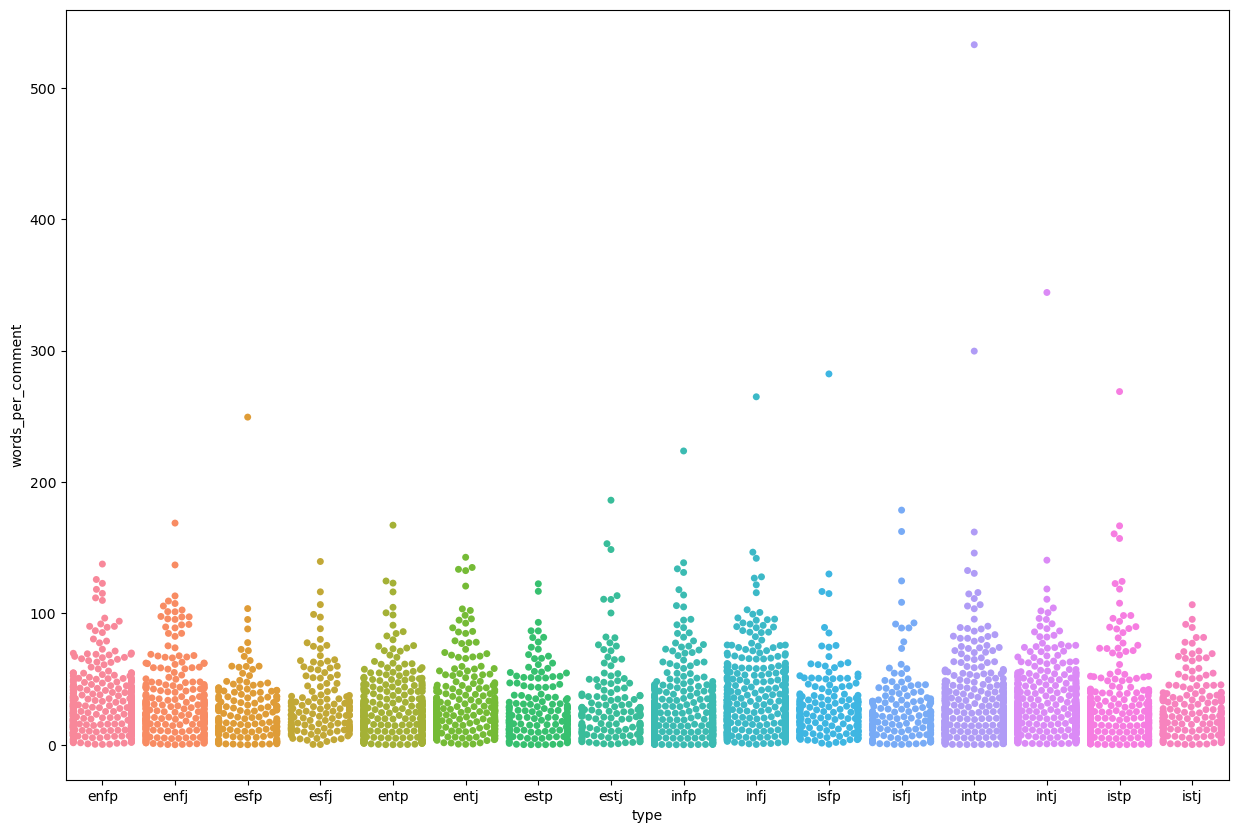

In [21]:
# 1명의 유저당 100개의 글(포스트, 댓글)을 ||| 을 기준으로 수집하였음.
# 밑 함수를 이용해 한 글 당 몇개의 단어가 있는지 확인!
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

# 1개의 글당 몇개의 단어가 있는지 확인!
df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/100)

plt.figure(figsize=(15,10))
sns.swarmplot(x="type", y="words_per_comment", data=df)

- 위와 같이 type별 포스팅에 따른 단어 수 분포가 크게 차이가 있으나, 일단 조치를 취하지 않고 학습 진행!

Text(0.5, 1.0, 'Distribution of Lengths of all 100 Posts')

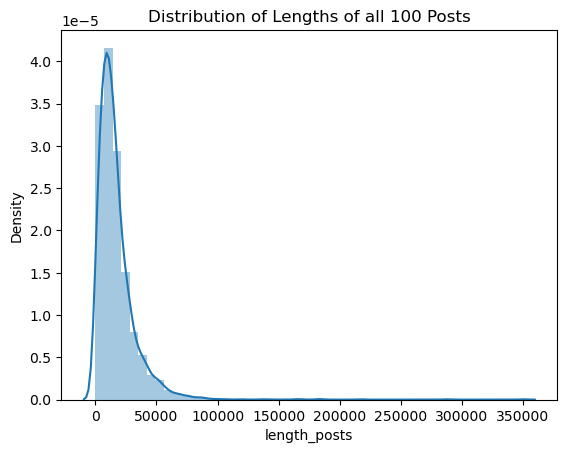

In [22]:
df["length_posts"] = df["posts"].apply(len)
sns.distplot(df["length_posts"]).set_title("Distribution of Lengths of all 100 Posts")

In [23]:
#df 안 가장 많이 보이는 단어 40개 출력!
words = list(df["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(40)

[('to', 346694),
 ('the', 339336),
 ('I', 321789),
 ('and', 295249),
 ('a', 256475),
 ('of', 188350),
 ('you', 149808),
 ('is', 149571),
 ('that', 141031),
 ('in', 137942),
 ('it', 118131),
 ('for', 111410),
 ('my', 100926),
 ('with', 87996),
 ('but', 87109),
 ('be', 81975),
 ('have', 81632),
 ('are', 72657),
 ('on', 71104),
 ('not', 70264),
 ('like', 68229),
 ('this', 64894),
 ('was', 62461),
 ('just', 60615),
 ('as', 60394),
 ('me', 60072),
 ('or', 58295),
 ('so', 56962),
 ('your', 52977),
 ('if', 50279),
 ('they', 49389),
 ('about', 47573),
 ('can', 46995),
 ('do', 43930),
 ('an', 43897),
 ('at', 41510),
 ('what', 40578),
 ('i', 39207),
 ('people', 37354),
 ('more', 36268)]

### 시각화 진행
- 전처리 후 분류 확인

In [24]:
# 전처리용 함수 생성
def clear_text(data):
    data_length=[]
    lemmatizer=WordNetLemmatizer()
    cleaned_text=[]
    for sentence in data.posts:
        sentence=sentence.lower()
        
#         링크에 해당하는 내용 삭제
        sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)
    
#         글자를 제외한 특수기호 식제
        sentence=re.sub('[^0-9a-z]',' ',sentence)
    
        
        data_length.append(len(sentence.split()))
        cleaned_text.append(sentence)
    return cleaned_text,data_length

In [25]:
# 전처리 진행할 데이터 확인
data.head(5)

,type,posts
0,enfp,"Hi ENFPs, have you ever experienced ending up ..."
1,enfp,"Hey guys, quick question: what do most guys in..."
2,enfp,"A GIRL SPERM 😭😭😭 honestly right, this is a les..."
3,enfp,Self imposed standards + Fi is a good thought....
4,enfp,it'd be a fun death :D|||why are people just s...


In [26]:
# 전처리 진행
data.posts, data_length=clear_text(data)

In [27]:
# 전처리 완료!
data.head(5)

,type,posts
0,enfp,hi enfps have you ever experienced ending up ...
1,enfp,hey guys quick question what do most guys in...
2,enfp,a girl sperm honestly right this is a les...
3,enfp,self imposed standards fi is a good thought ...
4,enfp,it d be a fun death d why are people just s...


In [28]:
# 데이터 분할!
train_data,test_data=train_test_split(data,test_size=0.25,random_state=42,stratify=data.type)

#### 글에 대한 벡터화 진행
- Tf-idf 벡터화 진행
- lemmaztizing 진행

In [29]:
class Lemmatizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, sentence): # 단어가 3개의 알파벳 이상으로 이루어졌을 때에만 토큰(피처)로 활용하도록!
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>2]

In [30]:
#import nltk
#nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\Byoung Jin
[nltk_data]     Oh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [31]:
vectorizer=TfidfVectorizer( max_features=5000,stop_words='english',tokenizer=Lemmatizer())
vectorizer.fit(train_data.posts)

TfidfVectorizer(max_features=5000, stop_words='english',
                tokenizer=<__main__.Lemmatizer object at 0x0000020E860477C0>)

In [32]:
train_post=vectorizer.transform(train_data.posts).toarray()
test_post=vectorizer.transform(test_data.posts).toarray()

In [33]:
train_post.shape

(3142, 5000)

In [34]:
target_encoder=LabelEncoder()
train_target=target_encoder.fit_transform(train_data.type)
test_target=target_encoder.fit_transform(test_data.type)

In [35]:
# 모델 선택
models_accuracy={}

In [36]:
#선형회귀 예측점수 확인.
model_log=LogisticRegression(max_iter=3000,C=0.5,n_jobs=-1)
model_log.fit(train_post,train_target)

LogisticRegression(C=0.5, max_iter=3000, n_jobs=-1)

In [37]:
models_accuracy['logistic regression']=accuracy_score(test_target,model_log.predict(test_post))
accuracy_score(test_target,model_log.predict(test_post))

0.35877862595419846

In [38]:
#Linear Support Vector classifier
model_linear_svc=LinearSVC(C=0.1)
model_linear_svc.fit(train_post,train_target)

LinearSVC(C=0.1)

In [39]:
models_accuracy['Linear Support Vector classifier']=accuracy_score(test_target,model_linear_svc.predict(test_post))
accuracy_score(test_target,model_linear_svc.predict(test_post))

0.4265267175572519

In [40]:
# Support Vector classifier
model_svc=SVC()
model_svc.fit(train_post,train_target)

SVC()

In [41]:
models_accuracy['Support Vector classifier']=accuracy_score(test_target,model_svc.predict(test_post))
accuracy_score(test_target,model_svc.predict(test_post))

0.3511450381679389

In [42]:
# Random Forest Classifier
model_forest=RandomForestClassifier(max_depth=10)
model_forest.fit(train_post,train_target)

RandomForestClassifier(max_depth=10)

In [43]:
models_accuracy['Random Forest Classifier']=accuracy_score(test_target,model_forest.predict(test_post))
accuracy_score(test_target,model_forest.predict(test_post))

0.3606870229007634

In [44]:
# XGBoost Classifier
model_xgb=XGBClassifier(objective='multi:softmax'
                        ,max_depth=5,n_estimators=50,learning_rate=0.1)
model_xgb.fit(train_post,train_target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              objective='multi:softmax', predictor=None, ...)

In [45]:
models_accuracy['XGBoost Classifier']=accuracy_score(test_target,model_xgb.predict(test_post))
accuracy_score(test_target,model_xgb.predict(test_post))

0.47900763358778625

In [46]:
accuarcy=pd.DataFrame(models_accuracy.items(),columns=['Models','Test accuracy'])

### 학습결과 확인
- 해당 학습은 전처리만 진행 후 이루어짐! 
- df 시각화로 확인된 이상치 정리하지 않은 것
- 모델 학습에 대한 파라미터도 크게 수정하지 않았음.

#### 이후 df 시각화로 확인된 이상치를 정리하고 다시 도출할 예정.

In [47]:
accuarcy.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

,Models,Test accuracy
0,XGBoost Classifier,0.479008
1,Linear Support Vector classifier,0.426527
2,Random Forest Classifier,0.360687
3,logistic regression,0.358779
4,Support Vector classifier,0.351145


### 이상치 삭제 후 다시 학습 진행

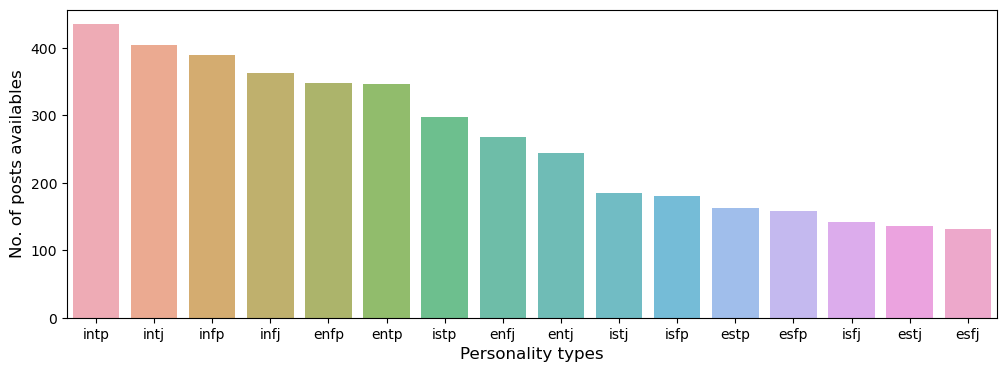

In [48]:
#mbti 타입별 분포 확인.
cnt_srs = data_set['type'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=cnt_srs.index,y= cnt_srs.values, alpha=0.8)
plt.xlabel('Personality types', fontsize=12)
plt.ylabel('No. of posts availables', fontsize=12)
plt.show()

In [49]:
data.head()

,type,posts
0,enfp,hi enfps have you ever experienced ending up ...
1,enfp,hey guys quick question what do most guys in...
2,enfp,a girl sperm honestly right this is a les...
3,enfp,self imposed standards fi is a good thought ...
4,enfp,it d be a fun death d why are people just s...


In [50]:
df2 = data.copy()

<AxesSubplot:xlabel='type', ylabel='words_per_comment'>

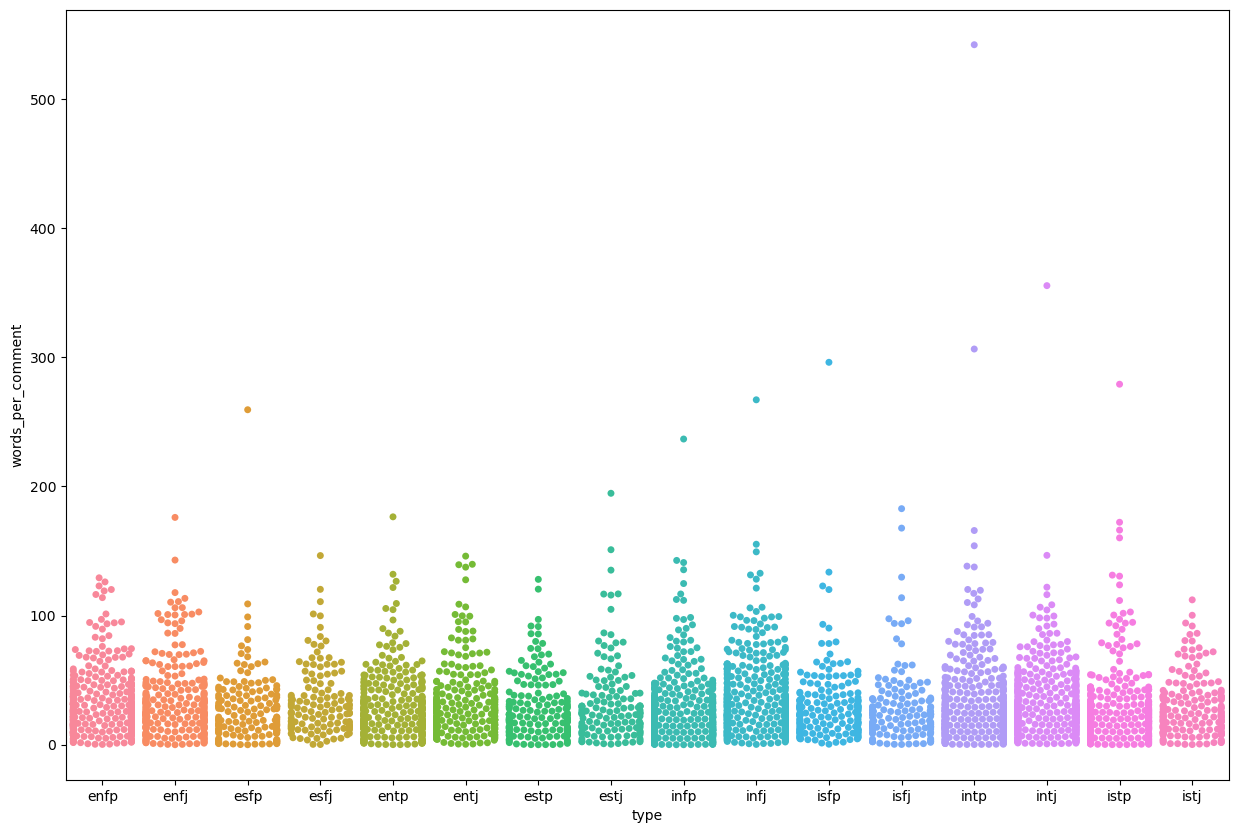

In [51]:
# 1명의 유저당 100개의 글(포스트, 댓글)을 ||| 을 기준으로 수집하였음.
# 밑 함수를 이용해 한 글 당 몇개의 단어가 있는지 확인!
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

# 1개의 글당 몇개의 단어가 있는지 확인!
df2['words_per_comment'] = df2['posts'].apply(lambda x: len(x.split())/100)

plt.figure(figsize=(15,10))
sns.swarmplot(x="type", y="words_per_comment", data=df2)

In [52]:
df2=df2[['type','posts','words_per_comment']]

In [53]:
df2

,type,posts,words_per_comment
0,enfp,hi enfps have you ever experienced ending up ...,42.03
1,enfp,hey guys quick question what do most guys in...,14.30
2,enfp,a girl sperm honestly right this is a les...,122.92
3,enfp,self imposed standards fi is a good thought ...,2.47
4,enfp,it d be a fun death d why are people just s...,10.06
...,...,...,...
4185,istj,happy cake day agreed we had a gnat issue ...,38.32
4186,istj,fav butcher great artwork btw i literally ...,9.72
4187,istj,there are definitely cool people there and i h...,42.21
4188,istj,so i thought i was an istj as all the tests an...,6.82


In [54]:
df3 = df2.copy()

In [55]:
# 시각화로 각 데이터셋에 이상치가 있음을 확인.
# mbti 별로 IQR 범위 구해 df 정리하자!
mbtis = ['enfp','enfj','esfp','esfj','entp','entj','estp','estj',
       'infp','infj', 'isfp', 'isfj', 'intp','intj','istp','istj']
df_iqr = pd.DataFrame()
for mbti in mbtis: 
    q3 = df2[df2['type']==mbti]['words_per_comment'].quantile(0.75)
    q1 = df2[df2['type']==mbti]['words_per_comment'].quantile(0.25)
    print(mbti,'\n',q3, q1)
    iqr = df2[(df2['type']==mbti) & (df2['words_per_comment']<=q3) & (df2['words_per_comment']>=q1)]
    df_iqr = pd.concat([df_iqr, iqr])

enfp 
 42.0675 15.25
enfj 
 43.54 14.605
esfp 
 38.2675 10.835
esfj 
 43.385000000000005 14.96
entp 
 35.63 13.157499999999999
entj 
 40.254999999999995 15.254999999999999
estp 
 38.197500000000005 11.5425
estj 
 41.7 13.25
infp 
 33.16 9.26
infj 
 51.44 15.935
isfp 
 37.14 13.14
isfj 
 35.845 12.485
intp 
 39.555 12.33
intj 
 43.05 15.9175
istp 
 35.192499999999995 12.8625
istj 
 37.64 12.86


In [56]:
df_iqr = df_iqr.reset_index(drop=True)
df_iqr

,type,posts,words_per_comment
0,enfp,hi enfps have you ever experienced ending up ...,42.03
1,enfp,i m not in yet but i m going in for 1n0 and s...,27.54
2,enfp,scored in the bottom 8 for order and having a...,38.54
3,enfp,good points he definitely struggles with work...,33.16
4,enfp,been seeing a lot of comments referring to go...,21.59
...,...,...,...
2085,istj,pretty average i do the last one isn t that...,18.37
2086,istj,sounds like me i really feel you i m in a...,21.77
2087,istj,we are considering a loan from a commercial le...,17.13
2088,istj,there s some easy trails that i like right by ...,19.93


In [57]:
types = np.unique(np.array(df_iqr['type']))
types

array(['enfj', 'enfp', 'entj', 'entp', 'esfj', 'esfp', 'estj', 'estp',
       'infj', 'infp', 'intj', 'intp', 'isfj', 'isfp', 'istj', 'istp'],
      dtype=object)

<AxesSubplot:xlabel='type', ylabel='words_per_comment'>

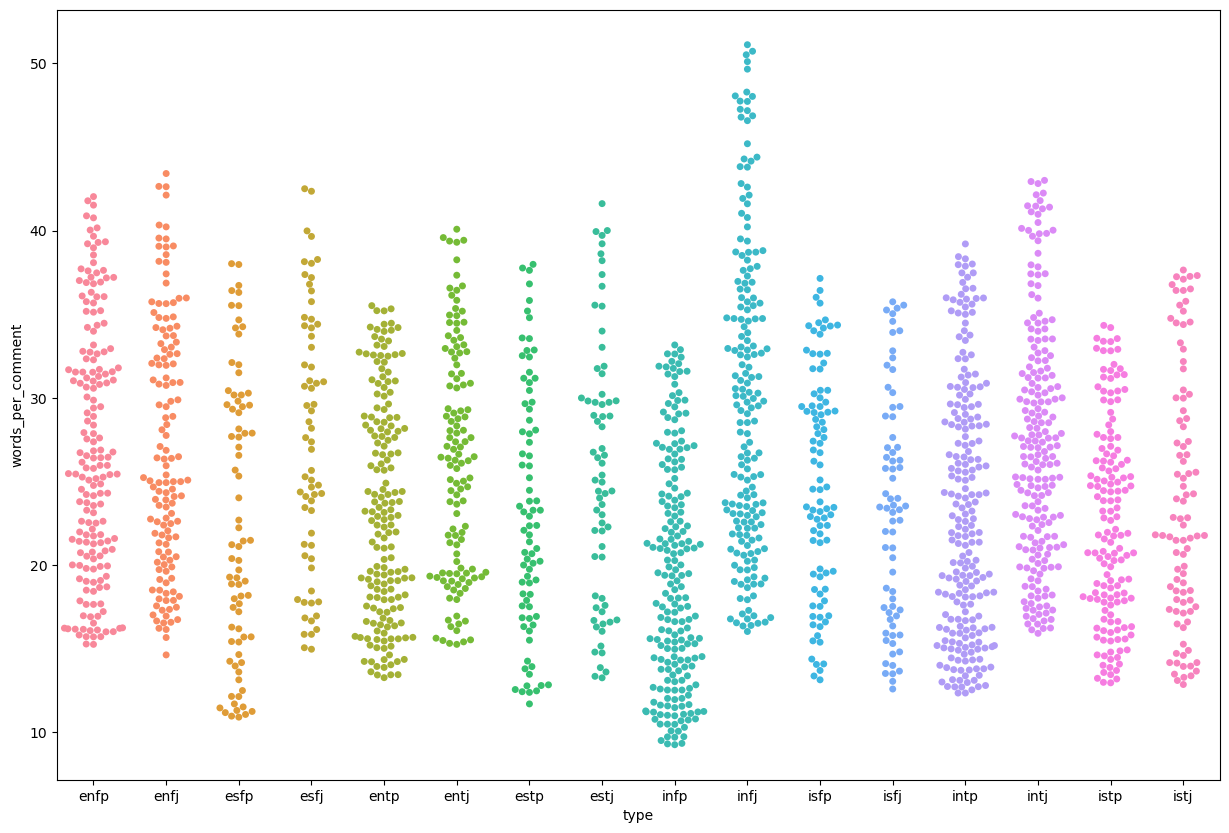

In [58]:
plt.figure(figsize=(15,10))
sns.swarmplot(x="type", y="words_per_comment", data=df_iqr)

Text(0.5, 1.0, 'Distribution of Lengths of all 100 Posts')

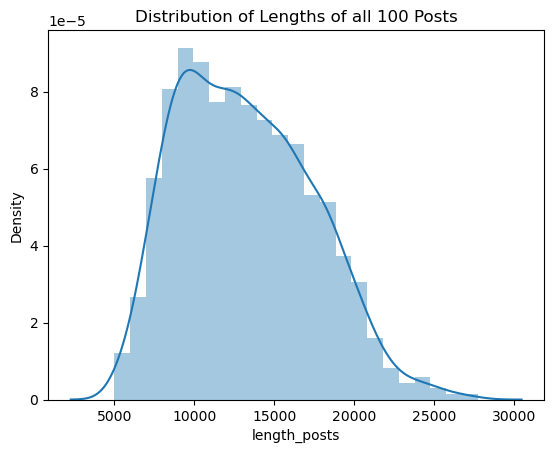

In [59]:
df_iqr["length_posts"] = df_iqr["posts"].apply(len)
sns.distplot(df_iqr["length_posts"]).set_title("Distribution of Lengths of all 100 Posts")

#### 위와 같이 각 mbti별 단어개수가 iqr 범위에 있는 데이터만 뽑아서, 보다 정규분포에 가까운 형태를 보임을 확인할 수 있음.
### 전처리 시작!

In [60]:
data2 = df_iqr.copy()

In [61]:
data2

,type,posts,words_per_comment,length_posts
0,enfp,hi enfps have you ever experienced ending up ...,42.03,21128
1,enfp,i m not in yet but i m going in for 1n0 and s...,27.54,14038
2,enfp,scored in the bottom 8 for order and having a...,38.54,19812
3,enfp,good points he definitely struggles with work...,33.16,17720
4,enfp,been seeing a lot of comments referring to go...,21.59,12150
...,...,...,...,...
2085,istj,pretty average i do the last one isn t that...,18.37,9617
2086,istj,sounds like me i really feel you i m in a...,21.77,11641
2087,istj,we are considering a loan from a commercial le...,17.13,9047
2088,istj,there s some easy trails that i like right by ...,19.93,10180


In [62]:
# 전처리 완료
data2.head()

,type,posts,words_per_comment,length_posts
0,enfp,hi enfps have you ever experienced ending up ...,42.03,21128
1,enfp,i m not in yet but i m going in for 1n0 and s...,27.54,14038
2,enfp,scored in the bottom 8 for order and having a...,38.54,19812
3,enfp,good points he definitely struggles with work...,33.16,17720
4,enfp,been seeing a lot of comments referring to go...,21.59,12150


In [63]:
# 데이터 분할!
train_data,test_data=train_test_split(data2,test_size=0.25,random_state=42,stratify=data2.type)

#### 글에 대한 벡터화 진행
- Tf-idf 벡터화 진행
- lemmaztizing 진행

In [64]:
class Lemmatizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, sentence):
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>2]

In [65]:
vectorizer=TfidfVectorizer( max_features=5000,stop_words='english',tokenizer=Lemmatizer())
vectorizer.fit(train_data.posts)

TfidfVectorizer(max_features=5000, stop_words='english',
                tokenizer=<__main__.Lemmatizer object at 0x0000020E8E0C93D0>)

In [66]:
train_post=vectorizer.transform(train_data.posts).toarray()
test_post=vectorizer.transform(test_data.posts).toarray()

In [67]:
train_post.shape

(1567, 5000)

In [68]:
target_encoder=LabelEncoder()
train_target=target_encoder.fit_transform(train_data.type)
test_target=target_encoder.fit_transform(test_data.type)

In [69]:
# 모델 선택
models_accuracy={}

In [70]:
#선형회귀 예측점수 확인.
model_log=LogisticRegression(max_iter=3000,C=0.5,n_jobs=-1)
model_log.fit(train_post,train_target)

LogisticRegression(C=0.5, max_iter=3000, n_jobs=-1)

In [71]:
models_accuracy['logistic regression']=accuracy_score(test_target,model_log.predict(test_post))
accuracy_score(test_target,model_log.predict(test_post))

0.32887189292543023

In [72]:
#Linear Support Vector classifier
model_linear_svc=LinearSVC(C=0.1)
model_linear_svc.fit(train_post,train_target)

LinearSVC(C=0.1)

In [73]:
models_accuracy['Linear Support Vector classifier']=accuracy_score(test_target,model_linear_svc.predict(test_post))
accuracy_score(test_target,model_linear_svc.predict(test_post))

0.39961759082217974

In [74]:
# Support Vector classifier
model_svc=SVC()
model_svc.fit(train_post,train_target)

SVC()

In [75]:
models_accuracy['Support Vector classifier']=accuracy_score(test_target,model_svc.predict(test_post))
accuracy_score(test_target,model_svc.predict(test_post))

0.32122370936902483

In [76]:
# Random Forest Classifier
model_forest=RandomForestClassifier(max_depth=10)
model_forest.fit(train_post,train_target)

RandomForestClassifier(max_depth=10)

In [77]:
models_accuracy['Random Forest Classifier']=accuracy_score(test_target,model_forest.predict(test_post))
accuracy_score(test_target,model_forest.predict(test_post))

0.384321223709369

In [78]:
# XGBoost Classifier
model_xgb=XGBClassifier(objective='multi:softmax', tree_method='exact', max_depth=5,n_estimators=50,learning_rate=0.1)
model_xgb.fit(train_post,train_target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              objective='multi:softmax', predictor=None, ...)

In [79]:
models_accuracy['XGBoost Classifier']=accuracy_score(test_target,model_xgb.predict(test_post))
accuracy_score(test_target,model_xgb.predict(test_post))

0.4474187380497132

In [80]:
accuarcy=pd.DataFrame(models_accuracy.items(),columns=['Models','Test accuracy'])

### 학습결과 확인

In [81]:
accuarcy.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

,Models,Test accuracy
0,XGBoost Classifier,0.447419
1,Linear Support Vector classifier,0.399618
2,Random Forest Classifier,0.384321
3,logistic regression,0.328872
4,Support Vector classifier,0.321224


### 1차 결과(모델에 따른 파라미터 세부수정 전)
- 시각화로 파악한 df 이상치 제거 이전과 이후의 차이는 XGB 모델에 있어선 큰 차이가 없었다.
- 다만 전자에 비해 후자에서 다른 모델들과의 정확도 차이가 크게 나타났음.

- 모델의 파라미터 세부화 및 데이터 세트를 IQR이 아닌 0.2~0.8 구간까지 잡아 진행하는 등, 조금 더 처리해서 비교해볼 필요가 보임.

## GridSearchcv 이용해서 여러가지 파라미터를 사용해 최적의 모델을 학습시키자

In [82]:
from sklearn.model_selection import GridSearchCV

In [84]:
#XGBoost 정의
# 피처 수가 너무 크기 때문에, 트리 100개로만 시험하자.
xgb= XGBClassifier(objective='multi:softmax', tree_method='exact', n_estimators=100)

xgb_param_grid={
    'learning_rate' : [0.01,0.05,0.1,0.15],
    'max_depth' : [3,5,7,10],
    'colsample_bytree' : [0.8,0.9],
}

# scoring 은 위와 같은 accuray로 설정
xgb_grid=GridSearchCV(xgb, param_grid = xgb_param_grid, scoring="accuracy", n_jobs=-1, verbose = 2)
xgb_grid.fit(train_post,train_target)

#best v 수치와 best parameter확인
print("best accuracy : {0: .4f}".format(xgb_grid.best_score_))
print("best param : ",xgb_grid.best_params_)

#dataframe으로 랭킹순보기
result_df = pd.DataFrame(xgb_grid.cv_results_)
result_df.sort_values(by=['rank_test_score'],inplace=True)

#plot
result_df[['params','mean_test_score','rank_test_score']].head(10)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
best accuracy :  0.4378
best param :  {'colsample_bytree': 0.8, 'learning_rate': 0.15, 'max_depth': 7}


,params,mean_test_score,rank_test_score
14,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.437775,1
13,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.437142,2
12,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.434586,3
29,"{'colsample_bytree': 0.9, 'learning_rate': 0.1...",0.434576,4
27,"{'colsample_bytree': 0.9, 'learning_rate': 0.1...",0.433304,5
31,"{'colsample_bytree': 0.9, 'learning_rate': 0.1...",0.432667,6
30,"{'colsample_bytree': 0.9, 'learning_rate': 0.1...",0.432042,7
8,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.432038,8
15,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.432032,9
11,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.432032,10


In [107]:
# XGBClassifier(objective='multi:softmax', tree_method='exact', n_estimators=100) 을 기본모델로 하고
# xgb_param_grid={
#     'learning_rate' : [0.01,0.05,0.1,0.15],
#     'max_depth' : [3,5,7,10],
#     'colsample_bytree' : [0.8,0.9],
# } 
# param grid를 위와 같이 설정해준 경우에는 
# {'colsample_bytree': 0.8, 'learning_rate': 0.15, 'max_depth': 7}로 최적값이 나왔다.

# 이걸 기반으로 n_estimators 수치를 조정해 최적값을 구해보자!
xgb_test1= XGBClassifier(objective='multi:softmax', tree_method='exact', n_estimators=200, eval_metric='merror', 
                         colsample_bytree= 0.8, learning_rate= 0.15, max_depth= 7)
xgb_test1.fit(train_post,train_target)
accuracy_score(test_target,xgb_test1.predict(test_post))
# 현재 max_features는 5000개일떄 아래 결과이다.

0.47992351816443596

In [ ]:
y_pred1 = xgb_test1.predict(test_post)

In [110]:
#y_pred 예측빈도확인
uni, count = np.unique(y_pred1, return_counts=True)
np.unique(y_pred1, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 array([24, 35, 23, 44,  5, 13, 13, 23, 47, 64, 66, 78, 11, 21, 20, 36],
       dtype=int64))

In [ ]:
pred = pd.DataFrame({'types':types, 'count':count})
pred = pred.set_index('types')

In [136]:
pred.sort_values('count',ascending=False)

,count
types,
intp,78
intj,66
infp,64
infj,47
entp,44
istp,36
enfp,35
enfj,24
entj,23


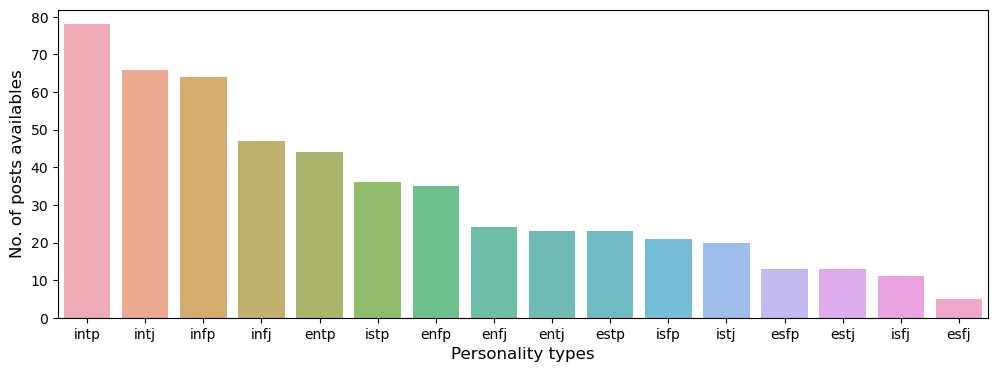

In [144]:
#예측된 mbti 타입별 분포 확인. [ 예측모델 비율 ]
pred_test = pred.sort_values('count',ascending=False)
plt.figure(figsize=(12,4))
sns.barplot(x=pred_test.index, y=pred_test['count'], alpha=0.8)
plt.xlabel('Personality types', fontsize=12)
plt.ylabel('No. of posts availables', fontsize=12)
plt.show()

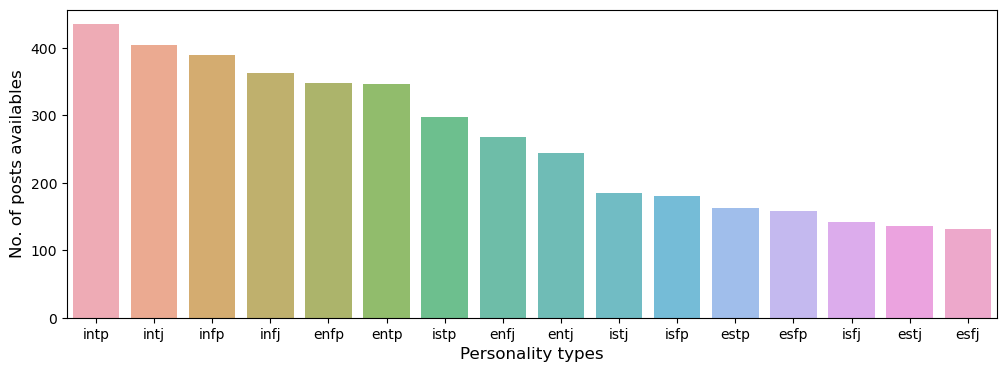

In [48]:
#mbti 타입별 분포 확인. [ 원모델 비율 ]
cnt_srs = data_set['type'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=cnt_srs.index,y= cnt_srs.values, alpha=0.8)
plt.xlabel('Personality types', fontsize=12)
plt.ylabel('No. of posts availables', fontsize=12)
plt.show()

### 위 아래 결과를 비교해보면 훈련모델과 예측모델의 mbti 분포가 유사함을 알 수 있음.
- 총 4개 그룹으로 나누어 비율이 유지되는 모습
    - 상위그룹 intp, intj, infp, infj 4개 그룹
    - 2위그룹 entp, istp, enfp, enfj 4개 그룹
    - 3위그룹 entj, estp, isfp, istj 4개 그룹
    - 4위 그룹 esfp, estj, isfj, esfj 4개 그룹.

### What if (1)
- 피처수를 줄이는 경우에 간극의 변화 확인. 
- 피처수를 5000에서 3000까지 줄이더라도 정확도에 있어 큰 변화가 나타나지 않는다면 3000개가 바람직하다!

In [123]:
# 데이터 분할!
train_data,test_data=train_test_split(data2,test_size=0.25,random_state=42,stratify=data2.type)

In [124]:
vectorizer=TfidfVectorizer(max_features=3000,stop_words='english',tokenizer=Lemmatizer())
vectorizer.fit(train_data.posts)

TfidfVectorizer(max_features=3000, stop_words='english',
                tokenizer=<__main__.Lemmatizer object at 0x000002890B6F1A00>)

In [125]:
train_post=vectorizer.transform(train_data.posts).toarray()
test_post=vectorizer.transform(test_data.posts).toarray()

In [126]:
target_encoder=LabelEncoder()
train_target=target_encoder.fit_transform(train_data.type)
test_target=target_encoder.fit_transform(test_data.type)

In [127]:
# XGBoost Classifier
model_xgb=XGBClassifier(objective='multi:softmax', tree_method='exact', eval_metric='error'
                        ,max_depth=5,n_estimators=50,learning_rate=0.1)
model_xgb.fit(train_post,train_target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              objective='multi:softmax', predictor=None, ...)

In [128]:
models_accuracy['XGBoost Classifier']=accuracy_score(test_target,model_xgb.predict(test_post))
accuracy_score(test_target,model_xgb.predict(test_post))
# 맥스 피처를 낮추어도 큰 변화는 없었다.

0.4588910133843212

##### 맥스 피처값을 5000 -> 3000으로, 3000-> 1000으로 더 낮추어보자.

In [130]:
vectorizer=TfidfVectorizer(max_features=1000,stop_words='english',tokenizer=Lemmatizer())
vectorizer.fit(train_data.posts)

TfidfVectorizer(max_features=1000, stop_words='english',
                tokenizer=<__main__.Lemmatizer object at 0x00000289103A7DF0>)

In [131]:
train_post=vectorizer.transform(train_data.posts).toarray()
test_post=vectorizer.transform(test_data.posts).toarray()

In [132]:
target_encoder=LabelEncoder()
train_target=target_encoder.fit_transform(train_data.type)
test_target=target_encoder.fit_transform(test_data.type)

In [133]:
# XGBoost Classifier
model_xgb=XGBClassifier(objective='multi:softmax', tree_method='exact', eval_metric='error'
                        ,max_depth=5,n_estimators=50,learning_rate=0.1)
model_xgb.fit(train_post,train_target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              objective='multi:softmax', predictor=None, ...)

In [135]:
models_accuracy['XGBoost Classifier']=accuracy_score(test_target,model_xgb.predict(test_post))
accuracy_score(test_target,model_xgb.predict(test_post))
# 맥스 피처값을 1000으로 낮추어도 유지가 된다! 

0.45506692160611856

In [136]:
# max feature를 낮출수록 => mbti를 분류하는 데 있어 보다 핵심이 되는 단어들만 가진 예측모델이 완성된다
# 다만 우리는 학습한 데이터(reddit)과 전혀 관련이 없는 데이터(웹소설 장르별 서머리 등..)를 예측할 예정이니 max_feature를 3000으로
# 설정하고 이후 작업을 할 것으로 결정했다.

# 위 모델 저장
# 아래 파일명으로 저장!
filename = 'model_xgb_iqr'

# 모델 저장
pickle.dump(model_xgb, open(filename, 'wb'))

### What if (2)
- iqr구간 0.25 ~ 0.75 데이터셋이 아닌 0.2~0.8 데이터셋으로 작업한다면 정확도는 어떻게 변할까?

In [146]:
df3

,type,posts,words_per_comment
0,enfp,hi enfps have you ever experienced ending up ...,42.03
1,enfp,hey guys quick question what do most guys in...,14.30
2,enfp,a girl sperm honestly right this is a les...,122.92
3,enfp,self imposed standards fi is a good thought ...,2.47
4,enfp,it d be a fun death d why are people just s...,10.06
...,...,...,...
4185,istj,happy cake day agreed we had a gnat issue ...,38.32
4186,istj,fav butcher great artwork btw i literally ...,9.72
4187,istj,there are definitely cool people there and i h...,42.21
4188,istj,so i thought i was an istj as all the tests an...,6.82


In [147]:
# 시각화로 각 데이터셋에 이상치가 있음을 확인.
# mbti 별로 IQR 범위 구해 df 정리하자!
mbtis = ['enfp','enfj','esfp','esfj','entp','entj','estp','estj',
       'infp','infj', 'isfp', 'isfj', 'intp','intj','istp','istj']
df_iqr2 = pd.DataFrame()
for mbti in mbtis: 
    q3 = df3[df3['type']==mbti]['words_per_comment'].quantile(0.8)
    q1 = df3[df3['type']==mbti]['words_per_comment'].quantile(0.2)
    print(mbti,'\n',q3, q1)
    iqr = df3[(df3['type']==mbti) & (df3['words_per_comment']<=q3) & (df3['words_per_comment']>=q1)]
    df_iqr2 = pd.concat([df_iqr2, iqr])

enfp 
 46.81 13.312000000000001
enfj 
 47.88800000000001 12.174000000000003
esfp 
 42.804 8.414000000000001
esfj 
 54.6 13.75
entp 
 42.83 10.78
entj 
 47.012 12.902000000000001
estp 
 46.646 10.42
estj 
 49.8 10.65
infp 
 37.580000000000005 8.076
infj 
 58.374 12.994
isfp 
 41.21 11.23
isfj 
 41.56600000000001 9.968000000000002
intp 
 44.422000000000004 10.23
intj 
 47.80200000000003 12.91
istp 
 41.57800000000001 10.326000000000002
istj 
 41.110000000000014 10.624000000000002


In [148]:
data3 = df_iqr2.copy()

In [149]:
# 데이터 분할!
train_data,test_data=train_test_split(data3,test_size=0.25,random_state=42,stratify=data3.type)

### max_feature=5000일 때

In [161]:
vectorizer=TfidfVectorizer(max_features=5000,stop_words='english',tokenizer=Lemmatizer())
vectorizer.fit(train_data.posts) 

TfidfVectorizer(max_features=5000, stop_words='english',
                tokenizer=<__main__.Lemmatizer object at 0x0000020E8F8AC4C0>)

In [162]:
train_post=vectorizer.transform(train_data.posts).toarray()
test_post=vectorizer.transform(test_data.posts).toarray()

In [163]:
target_encoder=LabelEncoder()
train_target=target_encoder.fit_transform(train_data.type)
test_target=target_encoder.fit_transform(test_data.type)

In [165]:
xgb_test1= XGBClassifier(objective='multi:softmax', tree_method='exact', n_estimators=200, eval_metric='merror', 
                         colsample_bytree= 0.8, learning_rate= 0.15, max_depth= 7)
xgb_test1.fit(train_post,train_target)
accuracy_score(test_target,xgb_test1.predict(test_post))

0.4968152866242038

In [176]:
y_pred1 = xgb_test1.predict(test_post) 

In [177]:
#y_pred 예측빈도확인
uni, count = np.unique(y_pred1, return_counts=True)
pred1 = pd.DataFrame({'types':types, 'count':count})

### max_feature=3000일 때

In [167]:
vectorizer=TfidfVectorizer(max_features=3000,stop_words='english',tokenizer=Lemmatizer())
vectorizer.fit(train_data.posts) 

TfidfVectorizer(max_features=3000, stop_words='english',
                tokenizer=<__main__.Lemmatizer object at 0x0000020E8F8E5220>)

In [168]:
train_post2=vectorizer.transform(train_data.posts).toarray()
test_post2=vectorizer.transform(test_data.posts).toarray()

In [169]:
target_encoder=LabelEncoder()
train_target2=target_encoder.fit_transform(train_data.type)
test_target2=target_encoder.fit_transform(test_data.type)

In [179]:
xgb_test2= XGBClassifier(objective='multi:softmax', tree_method='exact', n_estimators=100, eval_metric='merror', 
                         colsample_bytree= 0.8, learning_rate= 0.15, max_depth= 7)
xgb_test2.fit(train_post2,train_target2)
accuracy_score(test_target2,xgb_test2.predict(test_post2))
# 정확도가 max_feature=3000일 때와 비교하여 크게 변화하지 않으므로! xgb_test2 모델로 진행하자!

0.47770700636942676

In [172]:
y_pred2 = xgb_test2.predict(test_post2) 

In [173]:
#y_pred 예측빈도확인
uni, count = np.unique(y_pred1, return_counts=True)
pred2 = pd.DataFrame({'types':types, 'count':count})

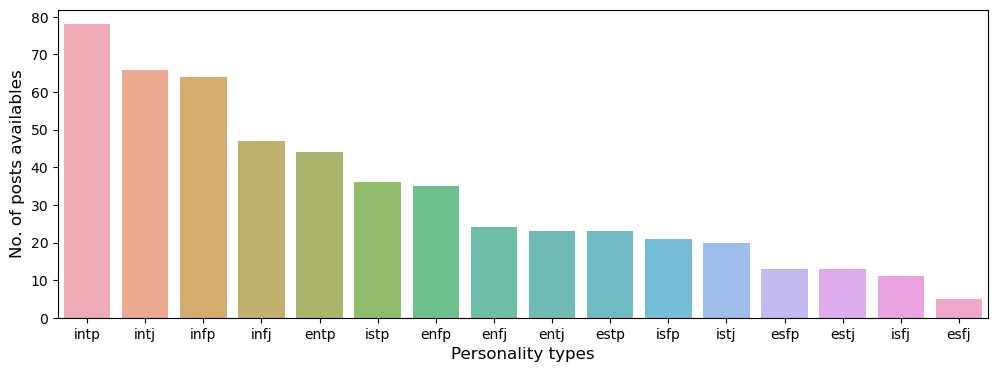

In [174]:
#예측된 mbti 타입별 분포 확인. [ 예측모델 비율 ]
pred_test2 = pred.sort_values('count',ascending=False)
plt.figure(figsize=(12,4))
sns.barplot(x=pred_test.index, y=pred_test['count'], alpha=0.8)
plt.xlabel('Personality types', fontsize=12)
plt.ylabel('No. of posts availables', fontsize=12)
plt.show()

<AxesSubplot:xlabel='type', ylabel='words_per_comment'>

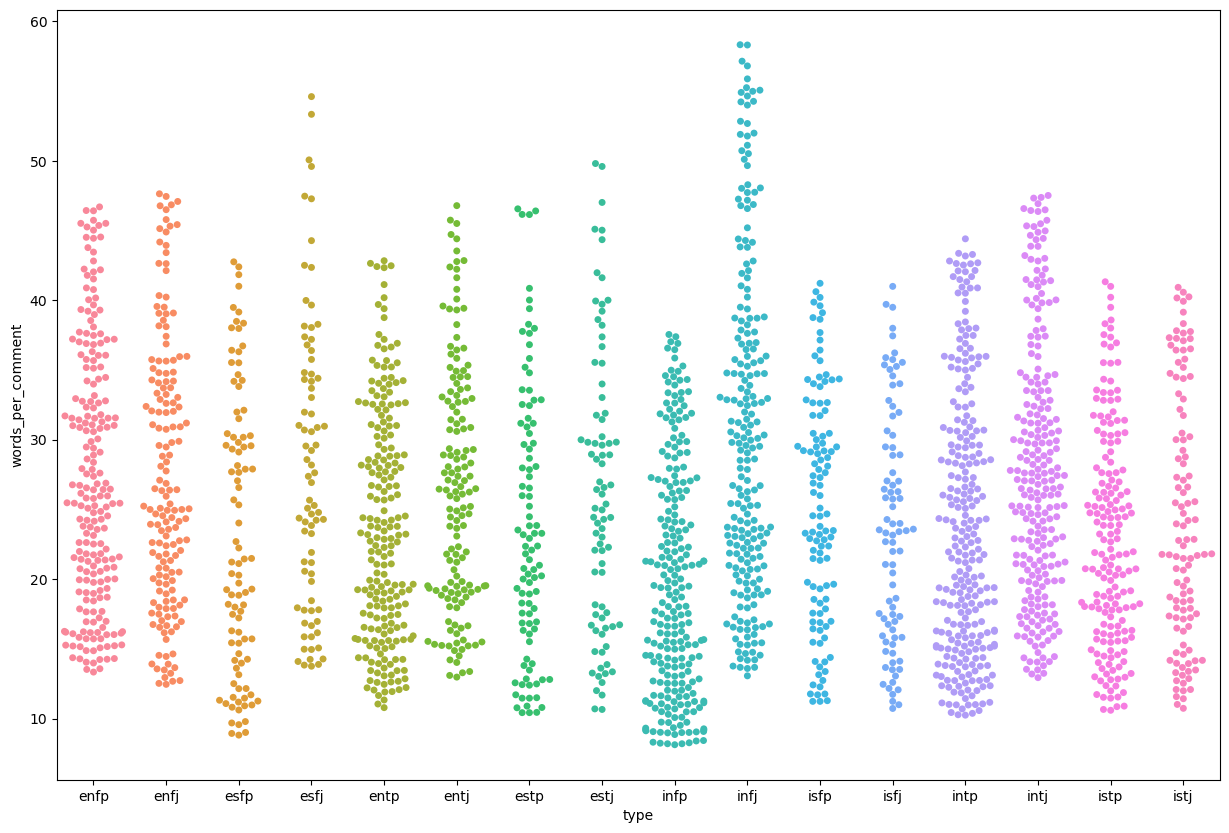

In [156]:
# iqr대로 0.25~0.75 보다
# 0.2~0.8까지의 분포를 이용하는게 더 좋은 성능을 보인다!!
# 학습 데이터를 수집한 reddit이 아닌, 다른 커뮤니티에서 수집한 글로 분석, 예측을 진행해야 하는 모델의 의도에 맞춰
# 더 다양한 예측을 제공할 수 있는 0.2~0.8까지의 분포를 이용한 위의 모델을 사용하자!
plt.figure(figsize=(15,10))
sns.swarmplot(x="type", y="words_per_comment", data=df_iqr2) 

### 2차 결과(GridSearchCV 결과 반영된 모델 저장)

In [180]:
### 학습된 모델 저장하기.
import pickle

# 모델 정의 및 학습
# 위에서 정의된 모델 model_xgb 사용!
#model_xgb_iqr=XGBClassifier(objective='multi:softmax'
#                        ,max_depth=5,n_estimators=50,learning_rate=0.1).fit(train_post,train_target)

# 아래 파일명으로 저장!
filename = 'model_xgb_final'

# 모델에 따른 파라미터 세부수정 후 저장된 model_xgb_final!!
# 모델 저장
pickle.dump(xgb_test2, open(filename, 'wb'))

# 모델 불러오기
model_xgb_iqr = pickle.load(open(filename, 'rb'))

### 현재 진행상황
- 학습용 데이터 수집 완료(레딧 API이용)
- 시각화 통한 데이터 이상치 제거 등 완료
- 텍스트 전처리 완료
- 텍스트를 Tf-idf 이용해 각 모델별로 학습한 정확도 도출.

- 학습된 모델로 mbti 예측결과 분석할 분석용 데이터 수집 완료(우울지표에 따른 레딧 포스트 + 인터넷 웹소설 장르별 포스트)

#### 분석용 데이터에 따른 mbti 결과 예측 후 결과 도출할 예정
##### 우울지표에 따른 레딧 포스트의 경우
- 특정 mbti에서 우울지표가 높게 나타날 수 있음을 파악할 수 있음
    - 이를 통해 특정 인터넷 게시글 작성자에게서 해당 mbti가 나타날 경우, 우울증 방지 캠페인 등, 도움이 될만한 컨텐츠로 연계 가능할 것으로 보임.
   
##### 웹소설 장르별 포스트 분석의 경우
- 웹소설 장르별 작가의 mbti 비율을 도출해낼 수 있음.
    - 대중에 널리 알려져 있는 mbti 선호 패턴을 통해, 특정 인터넷 게시글 작성자에 맞는 웹소설 광고 마케팅 방안을 수립할 수 있을 것으로 보임.